## From the given ‘Iris’ dataset, we have predicted the optimum number of clusters and represent it visually.

In [12]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns


In [13]:
# Load the iris dataset
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.shape

(150, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data does not have any nulls

In [16]:
#Dropping Id column
data.drop('Id',axis=1,inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
#checking for duplicate rows
print(data.duplicated().sum())

3


In [18]:
#dropping duplicate rows
data.drop_duplicates(inplace=True)
data.shape #after 3 rows deleted

(147, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


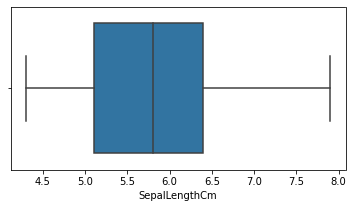

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


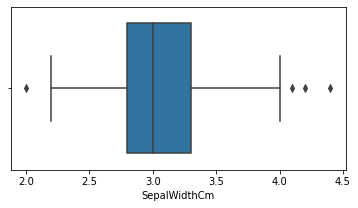

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


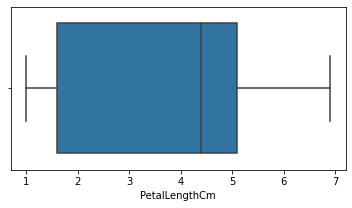

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


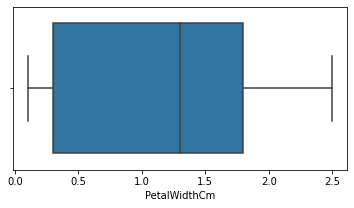

In [19]:
#Checking for any outliers in the numeric data
for i in data.columns:
  if data[i].dtype=='float64':
    plt.figure(figsize=(6,3))
    sns.boxplot(data[i])
    plt.show()

For sepal length there are no outliers. But for sepal width we have few outliers on both ends. Petal Length and Width columns dont have any outliers.

In [20]:
#Treating the outliers present in SepalWidth column
q1,q3=np.percentile(data['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
data['SepalWidthCm']=data['SepalWidthCm'].apply(lambda x:upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


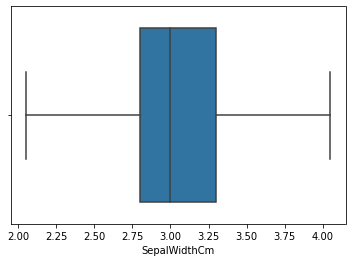

In [21]:
sns.boxplot(data['SepalWidthCm'])

Now we cannot see any outliers

## Understanding the data

In [22]:
#Target Class
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

We can see all the 3 classes that we have for the target are almost the same number

## Optimum number of clusters for KMean by using Elbow method

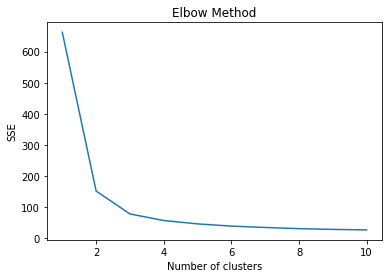

In [23]:
x=data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
sse=[] #sum of squared errors

for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  sse.append(km.inertia_)

plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (SSE) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [26]:
#Applying kmeans to the dataset/Creating kmeans classifier
km=KMeans(n_clusters=3,init = 'k-means++',max_iter=300,n_init = 10, random_state = 0)
y_kmeans=km.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [30]:
km.cluster_centers_

array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

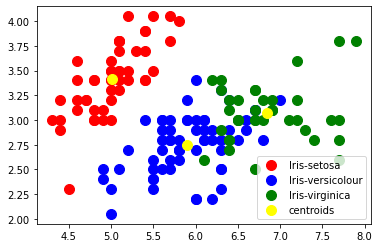

In [31]:
#Visualizing the clusters on the first 2 columns
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='yellow',label='centroids')


plt.legend()
